In [ ]:
import os, shutil, pathlib
import numpy as np
import pandas as pd
import random

In [ ]:
df = pd.read_csv('./data/covid19-xray-severity-scoring/metadata.csv', dtype={"BrixiaScore": str}, sep=';')
df

,Filename,StudyDate,Modality,Columns,Rows,Manufacturer,PhotometricInterpretation,BrixiaScore,BrixiaScoreGlobal,ConsensusTestset,Subject,StudyId,Sex,AgeAtStudyDateFiveYear
0,15626316918619298757.dcm,20200403,CR,2802,2801,SIEMENS,MONOCHROME2,000001,1,1,P2255,A0000,M,11
1,14564261561865340756.dcm,20200406,CR,2868,2320,Agfa,MONOCHROME1,000002,2,1,P2291,A0001,M,8
2,3030367955559789319.dcm,20200405,CR,2866,2350,SIEMENS,MONOCHROME2,000010,1,1,P2272,A0002,M,11
3,10548672632742803246.dcm,20200408,DX,3032,2520,CARESTREAM HEALTH,MONOCHROME1,000021,3,1,P2299,A0003,M,12
4,434139174381164494.dcm,20200409,DX,3032,2520,CARESTREAM HEALTH,MONOCHROME1,001001,2,1,P2076,A0004,M,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4690,10409101678672828001.dcm,20200314,CR,3000,2364,SIEMENS,MONOCHROME2,000001,1,0,P1071,A4582,M,10
4691,282205201992683717.dcm,20200318,DX,3032,2520,CARESTREAM HEALTH,MONOCHROME1,122023,10,0,P1071,A4583,M,10
4692,9504330565338059035.dcm,20200322,CR,2866,1752,SIEMENS,MONOCHROME2,233133,15,0,P0193,A4584,M,14
4693,8824145367570793429.dcm,20200331,DX,3032,2520,CARESTREAM HEALTH,MONOCHROME1,333133,16,0,P0193,A4585,M,14


In [ ]:
df['BrixiaScore'].unique()

array(['000001', '000002', '000010', ..., '333211', '333221', '333222'],
      shape=(1053,), dtype=object)

In [ ]:
df[df['BrixiaScore'] == '000000'].shape[0]

51

In [ ]:
np.sum(df.isnull())

Filename                     0
StudyDate                    0
Modality                     0
Columns                      0
Rows                         0
Manufacturer                 0
PhotometricInterpretation    0
BrixiaScore                  0
BrixiaScoreGlobal            0
ConsensusTestset             0
Subject                      0
StudyId                      0
Sex                          0
AgeAtStudyDateFiveYear       0
dtype: int64

In [ ]:
pd.unique(df['StudyId'])

array(['A0000', 'A0001', 'A0002', ..., 'A4584', 'A4585', 'A4586'],
      shape=(4583,), dtype=object)

In [ ]:
dup = df[df['StudyId'].duplicated()]['StudyId'].values
dup

array(['A0206', 'A0219', 'A0229', 'A0307', 'A0325', 'A0341', 'A0342',
       'A0352', 'A0386', 'A0422', 'A0431', 'A0457', 'A0488', 'A0489',
       'A0491', 'A0505', 'A0512', 'A0532', 'A0542', 'A0580', 'A0624',
       'A0668', 'A0017', 'A0683', 'A0701', 'A0703', 'A0734', 'A0758',
       'A0786', 'A0805', 'A0810', 'A0815', 'A0844', 'A0856', 'A0862',
       'A0975', 'A0983', 'A1007', 'A1028', 'A1034', 'A1124', 'A1140',
       'A1204', 'A1267', 'A1279', 'A1292', 'A1341', 'A1348', 'A1400',
       'A1536', 'A1547', 'A1594', 'A1768', 'A1818', 'A1843', 'A0055',
       'A1907', 'A1933', 'A1966', 'A1981', 'A1996', 'A2010', 'A2161',
       'A2174', 'A2196', 'A2245', 'A2269', 'A2278', 'A2305', 'A2353',
       'A2426', 'A2454', 'A2582', 'A2610', 'A2628', 'A2705', 'A2761',
       'A2772', 'A2813', 'A2914', 'A2951', 'A2990', 'A3021', 'A3068',
       'A3088', 'A0100', 'A3181', 'A3182', 'A0102', 'A3333', 'A3446',
       'A3463', 'A3556', 'A3572', 'A3580', 'A3597', 'A3676', 'A3822',
       'A3848', 'A38

In [ ]:
df[df['StudyId'].duplicated()]['StudyId'].index

Index([ 207,  221,  232,  311,  330,  347,  349,  360,  395,  432,
       ...
       4119, 4167, 4304, 4316, 4443, 4478, 4495, 4527, 4583, 4663],
      dtype='int64', length=112)

In [ ]:
df[df['StudyId'].isin(dup)].index

Index([  17,   55,  100,  102,  206,  207,  220,  221,  231,  232,
       ...
       4477, 4478, 4494, 4495, 4526, 4527, 4582, 4583, 4662, 4663],
      dtype='int64', length=224)

In [ ]:
df_dup = df[df['StudyId'].isin(dup)]
df_dup

df_unique = df.drop(index=df[df['StudyId'].isin(dup)].index)
df_unique

tt_df= df_unique[df_unique['ConsensusTestset'] == 1]
tt_df

train_df = df_unique[df_unique['ConsensusTestset'] == 0]
train_df


val_ratio = 0.2
SEED = 42

rng = np.random.default_rng(SEED)
idx = np.arange(len(train_df))
rng.shuffle(idx)

cut = int(len(idx) * val_ratio)
tr_idx, val_idx = idx[cut:], idx[:cut]

# train_df = train_df.reset_index()
tr_df = train_df.iloc[tr_idx]
val_df = train_df.iloc[val_idx]

tr_df = pd.concat([tr_df, df_dup], axis=0)
len(tr_df), len(val_df), len(tt_df)
print('총 갯수가 같음' if len(df) == len(tr_df) + len(val_df) + len(tt_df) else '총 갯수가 다름')

총 갯수가 같음


In [ ]:
df[df['StudyId'] == 'A0017']

,Filename,StudyDate,Modality,Columns,Rows,Manufacturer,PhotometricInterpretation,BrixiaScore,BrixiaScoreGlobal,ConsensusTestset,Subject,StudyId,Sex,AgeAtStudyDateFiveYear
17,8948075438738574081.dcm,20200407,DX,3032,2520,CARESTREAM HEALTH,MONOCHROME1,011001,3,1,P0579,A0017,M,11
704,17705803555187961663.dcm,20200407,DX,3032,2520,CARESTREAM HEALTH,MONOCHROME1,011001,3,0,P0579,A0017,M,11


In [ ]:
df[df['StudyId'] == 'A0055']	

,Filename,StudyDate,Modality,Columns,Rows,Manufacturer,PhotometricInterpretation,BrixiaScore,BrixiaScoreGlobal,ConsensusTestset,Subject,StudyId,Sex,AgeAtStudyDateFiveYear
55,14612253899954552711.dcm,20200408,CR,2866,2350,SIEMENS,MONOCHROME2,122013,9,1,P1951,A0055,M,13
1917,8064472228612578898.dcm,20200408,CR,2866,2350,SIEMENS,MONOCHROME2,122013,9,0,P1951,A0055,M,13


In [ ]:
df[df['StudyId'] == 'A0100']

,Filename,StudyDate,Modality,Columns,Rows,Manufacturer,PhotometricInterpretation,BrixiaScore,BrixiaScoreGlobal,ConsensusTestset,Subject,StudyId,Sex,AgeAtStudyDateFiveYear
100,5093857000665892168.dcm,20200408,CR,2866,2350,SIEMENS,MONOCHROME2,332012,11,1,P2317,A0100,M,16
3174,1654660754501173755.dcm,20200408,CR,2866,2350,SIEMENS,MONOCHROME2,332012,11,0,P2317,A0100,M,16


In [ ]:
df[df['StudyId'] == 'A0102']

,Filename,StudyDate,Modality,Columns,Rows,Manufacturer,PhotometricInterpretation,BrixiaScore,BrixiaScoreGlobal,ConsensusTestset,Subject,StudyId,Sex,AgeAtStudyDateFiveYear
102,2583228044866149758.dcm,20200408,DX,3032,2520,CARESTREAM HEALTH,MONOCHROME1,333322,16,1,P1416,A0102,M,11
3286,11217029884723267958.dcm,20200408,DX,3032,2520,CARESTREAM HEALTH,MONOCHROME1,333322,16,0,P1416,A0102,M,11


In [ ]:
from PIL import Image

In [ ]:
ls

' BrixIA.ipynb'      dl_deep_d6.ipynb     '강사님이 주신 코드.ipynb'
 assignment/         dl_deep_d7.ipynb     '데이터 다운 코드.ipynb'
 cnn_trained.pth     dl_deep_d8.ipynb      야로롱.ipynb
 data/               dl_deep_d9.ipynb      야로롱2.ipynb
 dl_deep_d10.ipynb   ran_openpose_lab/    '의료 데이터-Copy1.ipynb'
 dl_deep_d11.ipynb   runs/                 자원정리.ipynb
 dl_deep_d12.ipynb   runs_pneumonia_cls/
 dl_deep_d13.ipynb   scratch.ipynb


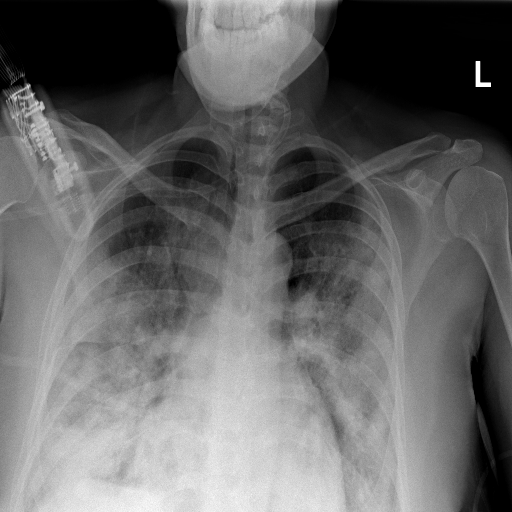

In [ ]:
Image.open('./data/covid19-xray-severity-scoring/raw_png/8723960941776295387.png')

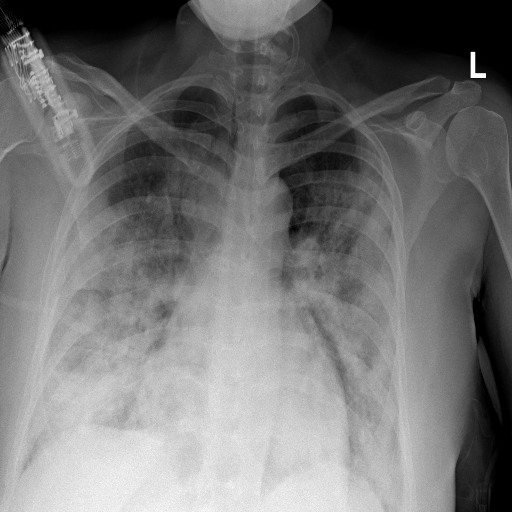

In [ ]:
Image.open('./data/covid19-xray-severity-scoring/raw_png/13853161129125006850.png')

In [ ]:
# 데이터프레임에서 6개 Zone으로 분리
df_score = pd.DataFrame()
df_score["B1"] = df["BrixiaScore"].str[0].astype(int)
df_score["B2"] = df["BrixiaScore"].str[1].astype(int)
df_score["B3"] = df["BrixiaScore"].str[2].astype(int)
df_score["B4"] = df["BrixiaScore"].str[3].astype(int)
df_score["B5"] = df["BrixiaScore"].str[4].astype(int)
df_score["B6"] = df["BrixiaScore"].str[5].astype(int)
df_score.head(20)

,B1,B2,B3,B4,B5,B6
0,0,0,0,0,0,1
1,0,0,0,0,0,2
2,0,0,0,0,1,0
3,0,0,0,0,2,1
4,0,0,1,0,0,1
5,0,0,1,0,0,1
6,0,0,1,0,0,1
7,0,0,1,0,1,1
8,0,0,1,0,1,2
9,0,0,1,0,3,3


In [ ]:
for col in df_score.columns:
    for score in range(4):
        print(f'{col} col의 {score}의 개수는 {df_score[df_score[col] == score].shape[0]}')

B1 col의 0의 개수는 2119
B1 col의 1의 개수는 1517
B1 col의 2의 개수는 718
B1 col의 3의 개수는 341
B2 col의 0의 개수는 936
B2 col의 1의 개수는 1237
B2 col의 2의 개수는 1524
B2 col의 3의 개수는 998
B3 col의 0의 개수는 524
B3 col의 1의 개수는 1050
B3 col의 2의 개수는 1740
B3 col의 3의 개수는 1381
B4 col의 0의 개수는 2572
B4 col의 1의 개수는 1381
B4 col의 2의 개수는 542
B4 col의 3의 개수는 200
B5 col의 0의 개수는 998
B5 col의 1의 개수는 1204
B5 col의 2의 개수는 1499
B5 col의 3의 개수는 994
B6 col의 0의 개수는 549
B6 col의 1의 개수는 1007
B6 col의 2의 개수는 1627
B6 col의 3의 개수는 1512


In [ ]:
import os, random, time
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import pandas as pd

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from torchvision.transforms import functional as TF
from torchvision.models import efficientnet_b5, EfficientNet_B5_Weights

from tqdm import tqdm
from torch.amp import autocast

# --- (2) 경로 설정 및 하이퍼파라미터 ---
BASE_DIR     = f"./data/covid19-xray-severity-scoring/"
CSV_PATH     = str(Path(BASE_DIR) / "metadata.csv")
IMAGE_DIR    = str(Path(BASE_DIR) / "raw_png")

OUT_DIR      = "./runs_severity_regression"
BEST_PATH    = str(Path(OUT_DIR) / "best_efficientnet_b5_regression.pt")
os.makedirs(OUT_DIR, exist_ok=True)

DEVICE     = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
SEED       = 42
IMG_SIZE   = 456
BATCH_SIZE = 32
EPOCHS     = 30
LR         = 1e-3
WEIGHT_DECAY = 1e-4
AMP        = True

# --- (3) 시드 고정 및 변환(Transform) 함수 ---
def set_seed(seed=SEED):
    random.seed(seed); np.random.seed(seed)
    torch.manual_seed(seed); torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = False
    torch.backends.cudnn.benchmark = True
set_seed(SEED)

def make_transform(train: bool):
    def _tfm(img: Image.Image):
        img = img.convert('RGB')
        img = TF.resize(img, [IMG_SIZE, IMG_SIZE], interpolation=TF.InterpolationMode.BILINEAR)
        if train:
            if torch.rand(1).item() < 0.5:
                img = TF.hflip(img)
            angle = float(torch.empty(1).uniform_(-30, 30))
            max_dx = 0.1 * IMG_SIZE; max_dy = 0.1 * IMG_SIZE
            translations = (float(torch.empty(1).uniform_(-max_dx, max_dx)),
                            float(torch.empty(1).uniform_(-max_dy, max_dy)))
            scale = float(torch.empty(1).uniform_(0.8, 1.2))
            shear = 0.0
            img = TF.affine(img, angle=angle, translate=translations, scale=scale, shear=shear,
                            interpolation=TF.InterpolationMode.BILINEAR)
        img = TF.to_tensor(img)
        img = TF.normalize(img, [0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
        return img
    return _tfm

# --- (4) 데이터 로드, 분할 및 커스텀 데이터셋 정의 ---

# 4-1. CSV 로드 및 분할
df = pd.read_csv(CSV_PATH, sep=';', dtype={'BrixiaScore': str})
df = df.dropna(subset=['BrixiaScore']) 
df = df[df['BrixiaScore'] != 'nan']
mask = df['BrixiaScore'].apply(lambda x: len(x) == 6)
df = df[mask]
print(f"길이가 6인 유효한 데이터: {len(df)}개")

# --- 유사한 데이터는 모두 train dataset, train:val = 8:2로 분리.
dup = df[df['StudyId'].duplicated()]['StudyId'].values # 유사한 이미지들의 인덱스

df_dup = df[df['StudyId'].isin(dup)] # 유사한 이미지들의 DataFrame
df_unique = df.drop(index=df[df['StudyId'].isin(dup)].index) # 유일한 이미지들의 DataFrame

tt_df= df_unique[df_unique['ConsensusTestset'] == 1]
train_df = df_unique[df_unique['ConsensusTestset'] == 0]

val_ratio = 0.2
SEED = 42

rng = np.random.default_rng(SEED)
idx = np.arange(len(train_df))
rng.shuffle(idx)

cut = int(len(idx) * val_ratio)
tr_idx, val_idx = idx[cut:], idx[:cut]

# train_df = train_df.reset_index()
tr_df = train_df.iloc[tr_idx]
val_df = train_df.iloc[val_idx]

tr_df = pd.concat([tr_df, df_dup], axis=0)
len(tr_df), len(val_df), len(tt_df)

print(f"Total: {len(df)}, Train: {len(tr_df)}, Val: {len(val_df)}, Test: {len(tt_df)}")
print('갯수가 알맞게 분리됨.' if len(df) == len(tr_df) + len(val_df) + len(tt_df) else '총 갯수와 분리된 총합이 다름')

# 부위별 train_label 분리
df_score = pd.DataFrame()
df_score["A"] = tr_df["BrixiaScore"].str[0].astype(int)
df_score["B"] = tr_df["BrixiaScore"].str[1].astype(int)
df_score["C"] = tr_df["BrixiaScore"].str[2].astype(int)
df_score["D"] = tr_df["BrixiaScore"].str[3].astype(int)
df_score["E"] = tr_df["BrixiaScore"].str[4].astype(int)
df_score["F"] = tr_df["BrixiaScore"].str[5].astype(int)

train_labels = torch.tensor(df_score.values, dtype=torch.long)  # shape: [N, 6]

# 4-2. 커스텀 데이터셋
class BrixiaDataset(Dataset):
    def __init__(self, dataframe, img_dir, transform=None):
        self.df = dataframe.reset_index(drop=True)
        self.img_dir = img_dir
        self.transform = transform
        self.img_col = "Filename"
        self.label_col = "BrixiaScore"

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        row = self.df.iloc[idx].to_dict()
        img_name_from_csv = row[self.img_col]
        img_name = img_name_from_csv.replace('.dcm', '.png')
        img_path = os.path.join(self.img_dir, img_name) 
        try:
            image = Image.open(img_path).convert('RGB')
        except FileNotFoundError:
            print(f"--- [오류] 파일을 찾을 수 없습니다! ---")
            print(f"시도한 경로: {img_path}")
            print(f"CSV 원본 파일명: {img_name_from_csv}")
            raise
        scores_str = row[self.label_col]
        try:
            scores_list = list(scores_str)
            labels = torch.tensor([float(score) for score in scores_list], dtype=torch.float32)
            if len(labels) != 6:
                 raise ValueError(f"Label length is not 6. Got: {len(labels)}")
        except Exception as e:
            print(f"--- [오류] 라벨 변환 중 오류 ---")
            print(f"원본 문자열: '{scores_str}'")
            print(f"오류: {e}")
            raise
        if self.transform:
            image = self.transform(image)
        return image, labels

# 4-3. DataLoader 정의
tr_ds = BrixiaDataset(tr_df, IMAGE_DIR, transform=make_transform(True))
val_ds = BrixiaDataset(val_df,   IMAGE_DIR, transform=make_transform(False))
tt_ds = BrixiaDataset(tt_df,  IMAGE_DIR, transform=make_transform(False))
tr_loader = DataLoader(tr_ds, batch_size=BATCH_SIZE, shuffle=True,
                       num_workers=4, pin_memory=torch.cuda.is_available())
val_loader = DataLoader(val_ds, batch_size=BATCH_SIZE, shuffle=False,
                       num_workers=4, pin_memory=torch.cuda.is_available())
tt_loader = DataLoader(tt_ds, batch_size=BATCH_SIZE, shuffle=False,
                       num_workers=4, pin_memory=torch.cuda.is_available())
print("BrixiaDataset 및 DataLoader 준비 완료.")

def ensure_labels_ndim(labels, target_dim=2, num_regions=6):
    """labels가 [N]일 때 [N, num_regions]로 확장"""
    if isinstance(labels, torch.Tensor):
        if labels.ndim == 1 and target_dim == 2:
            labels = labels.unsqueeze(1).repeat(1, num_regions)
    elif isinstance(labels, np.ndarray):
        if labels.ndim == 1 and target_dim == 2:
            labels = np.tile(labels.reshape(-1, 1), (1, num_regions))
    return labels

def calculate_class_weights(labels, num_classes=4, method='balanced'):
    """클래스 불균형 가중치 반환"""
    if isinstance(labels, torch.Tensor):
        labels = labels.cpu().numpy()
    labels_flat = labels.flatten()
    total = len(labels_flat)
    counts = np.bincount(labels_flat.astype(int), minlength=num_classes)
    if method == 'balanced':
        weights = total / (num_classes * (counts + 1e-6))
    elif method == 'inverse':
        weights = 1.0 / (counts + 1e-6)
    elif method == 'sqrt_inverse':
        weights = 1.0 / (np.sqrt(counts) + 1e-6)
    else:
        raise ValueError(f"Unknown method: {method}")
    weights = weights / weights.mean()
    return torch.FloatTensor(weights)

def calculate_region_weights(labels, num_regions=6, method='std'):
    """부위별 가중치 반환"""
    if isinstance(labels, torch.Tensor):
        labels = labels.cpu().numpy()
    labels = ensure_labels_ndim(labels, target_dim=2, num_regions=num_regions)
    weights = []
    for region_idx in range(num_regions):
        region_labels = labels[:, region_idx]
        counts = np.bincount(region_labels.astype(int), minlength=4)
        if method == 'std':
            std = counts.std()
            weights.append(1.0 + std / 500)
        elif method == 'entropy':
            probs = counts / (counts.sum() + 1e-6)
            entropy = -np.sum(probs * np.log(probs + 1e-6))
            max_entropy = np.log(4)
            imbalance = 1.0 - (entropy / max_entropy)
            weights.append(1.0 + imbalance)
        elif method == 'imbalance_ratio':
            ratio = (counts.max() + 1) / (counts.min() + 1)
            weights.append(ratio / 2.0)
        else:
            raise ValueError(f"Unknown method: {method}")
    weights = np.array(weights)
    weights = weights / weights.mean()
    return torch.FloatTensor(weights)

# def print_class_distribution(labels, region_names=None):
#     """클래스 분포(터미널용)"""
#     if isinstance(labels, torch.Tensor):
#         labels = labels.cpu().numpy()
#     labels = ensure_labels_ndim(labels, target_dim=2, num_regions=labels.shape[1])
#     num_regions = labels.shape[1]
#     if region_names is None:
#         region_names = [f"Region{i}" for i in range(num_regions)]
#     print("=" * 60)
#     print("Class Distribution Analysis")
#     print("=" * 60)
#     for idx, name in enumerate(region_names):
#         region_labels = labels[:, idx]
#         counts = np.bincount(region_labels.astype(int), minlength=4)
#         total = counts.sum()
#         print(f"\n{name}:")
#         for cls in range(4):
#             pct = 100 * counts[cls] / total
#             bar = '█' * int(pct / 2)
#             print(f"  Class {cls}: {counts[cls]:4d} ({pct:5.1f}%) {bar}")
#         max_ratio = counts.max() / (counts.min() + 1)
#         std = counts.std()
#         print(f"  Imbalance: max/min={max_ratio:.2f}, std={std:.1f}")
#     print("=" * 60)

class UnifiedMedicalLoss(nn.Module):
    """
    분류/회귀 + 자동(클래스/부위별) + Focal Loss까지 모두 지원하는 통합 손실함수
    [필수 인자]  
    - task_type: 'regression' 또는 'classification'
    - train_loader or train_labels: 학습 레이블 (분포 추정용)
    [주요 옵션]
    - use_class_weights, use_region_weights, focal_weight, focal_gamma, constraint_weight 등
    """
    def __init__(
        self,
        train_loader=None,
        train_labels=None,
        num_classes=4,
        num_regions=6,
        task_type='regression',  # 'regression' or 'classification'
        use_class_weights=True,
        use_region_weights=True,
        class_method='balanced',
        region_method='std',
        focal_weight=0.0,
        focal_gamma=2.0,
        constraint_weight=0.0
    ):
        super().__init__()
        self.task_type = task_type
        self.num_classes = num_classes
        self.num_regions = num_regions
        self.focal_weight = focal_weight
        self.focal_gamma = focal_gamma
        self.constraint_weight = constraint_weight

        # 레이블 추출
        if train_labels is None and train_loader is not None:
            train_labels = torch.cat([l for _, l in train_loader], dim=0)
        if train_labels is None:
            raise ValueError("train_loader or train_labels must be provided")

        # print_class_distribution(train_labels, region_names=[chr(65+i) for i in range(num_regions)])

        if use_class_weights:
            class_weights = calculate_class_weights(train_labels, num_classes=num_classes, method=class_method)
            self.register_buffer('class_weights', class_weights)
        else:
            self.class_weights = None
        if use_region_weights:
            region_weights = calculate_region_weights(train_labels, num_regions=num_regions, method=region_method)
            self.register_buffer('region_weights', region_weights)
        else:
            self.region_weights = None

    def forward(self, pred, target):
        if self.task_type == 'regression':
            return self._regression_loss(pred, target)
        elif self.task_type == 'classification':
            return self._classification_loss(pred, target)
        else:
            raise ValueError(f"Unknown task_type: {self.task_type}")

    def _regression_loss(self, pred, target):
        # [B, num_regions]
        target = ensure_labels_ndim(target, target_dim=2, num_regions=self.num_regions)
        loss = F.smooth_l1_loss(pred, target, reduction='none')
        if self.region_weights is not None:
            region_weights = self.region_weights.to(pred.device)
            loss = loss * region_weights.unsqueeze(0)
        if self.class_weights is not None:
            target_int = target.round().clamp(0, self.num_classes-1).long()
            class_weights = self.class_weights.to(pred.device)
            class_weight_map = class_weights[target_int]
            loss = loss * class_weight_map
        # 회귀 + Focal(희귀 케이스 강조)
        if self.focal_weight > 0:
            diff = torch.abs(pred - target)
            focal_mod = torch.exp(-diff * self.focal_gamma)
            loss = (1 - self.focal_weight) * loss + self.focal_weight * (1 - focal_mod) * loss
        # 값 범위 제약 (예: [0,3] 내 예측 유도)
        if self.constraint_weight > 0:
            clamp_loss = (torch.relu(pred - (self.num_classes-1)) + torch.relu(0 - pred)).mean()
            loss = loss.mean() + self.constraint_weight * clamp_loss
        return loss.mean()

    def _classification_loss(self, pred, target):
        # pred: [B, num_regions, num_classes], target: [B, num_regions]
        B, R, C = pred.shape
        pred = pred.view(-1, C)
        target = target.long().view(-1)
        ce = F.cross_entropy(pred, target, weight=(self.class_weights if self.class_weights is not None else None), reduction='none')
        if self.region_weights is not None:
            region_weights = self.region_weights.to(pred.device)
            region_ids = torch.arange(R).repeat(B).to(target.device)
            ce = ce * region_weights[region_ids]
        # focal modulate
        if self.focal_weight > 0:
            pt = torch.exp(-ce)
            ce = (1 - self.focal_weight) * ce + self.focal_weight * ((1 - pt) ** self.focal_gamma * ce)
        return ce.mean()

# --- 회귀용 (가중치/포컬/제약) ---
criterion = UnifiedMedicalLoss(
    train_labels=train_labels,        # 또는 train_loader=...
    task_type='regression',
    use_class_weights=True,
    use_region_weights=True,
    focal_weight=0.3,
    constraint_weight=0.05
)
# --- 분류용 (포컬 가중치 적용) ---
# criterion = UnifiedMedicalLoss(
#     train_labels=train_labels,
#     task_type='classification',
#     focal_weight=0.25,
# )

# --- (3) 모델 정의 (회귀 출력) ---
class EfficientNetB5Regression(nn.Module):
    def __init__(self, pretrained=True):
        super().__init__()
        from torchvision.models import efficientnet_b5, EfficientNet_B5_Weights
        weights = EfficientNet_B5_Weights.IMAGENET1K_V1 if pretrained else None
        self.backbone = efficientnet_b5(weights=weights)
        in_feat = self.backbone.classifier[1].in_features
        
        # 회귀: 6개 부위, 각각 0~3 범위의 연속값 출력
        self.backbone.classifier[1] = nn.Sequential(
            nn.Linear(in_feat, 256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, 6)  # 6개 부위
        )

    def forward(self, x):
        out = self.backbone(x)  # [B, 6]
        # Sigmoid로 0~1 범위로 제한 후 3배 -> 0~3 범위
        out = torch.sigmoid(out) * 3.0
        return out

model = EfficientNetB5Regression(pretrained=True).to(DEVICE)
optimizer = torch.optim.AdamW(model.parameters(), lr=LR, weight_decay=WEIGHT_DECAY)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
    optimizer, mode='min', factor=0.1, patience=3, min_lr=1e-6
)
scaler = torch.amp.GradScaler('cuda', enabled=AMP and torch.cuda.is_available())


# --- (5) 평가지표 (회귀 + 분류 정확도) ---
@torch.no_grad()
def calculate_metrics(preds, labels):
    """
    회귀 출력 → 다양한 평가 지표
    - MAE: 평균 절대 오차 (회귀)
    - RMSE: 제곱근 평균 제곱 오차 (회귀)
    - Exact Acc: 반올림 후 정확히 맞춘 비율 (분류)
    - Off-by-1 Acc: ±1 허용 정확도 (분류)
    """
    # MAE (회귀 지표)
    mae = torch.abs(preds - labels).mean().item()
    
    # RMSE (회귀 지표)
    rmse = torch.sqrt(((preds - labels) ** 2).mean()).item()

    # r2-score (회귀 지표)
    labels_mean = torch.mean(labels)
    ss_tot = torch.sum((labels - labels_mean) ** 2).item()
    ss_res = torch.sum((labels - preds) ** 2).item()
    r2 = 1 - ss_res / ss_tot
    
    # 분류 관점 평가를 위해 반올림
    preds_rounded = preds.round().clamp(0, 3)
    
    # Exact Accuracy (분류 지표)
    exact_acc = (preds_rounded == labels).float().mean().item()
    
    # Off-by-1 Accuracy (분류 지표)
    off_by_1 = (torch.abs(preds_rounded - labels) <= 1).float().mean().item()
    
    return mae, rmse, r2, exact_acc, off_by_1


# --- (6) 학습 루프 ---
def train_epoch(model, tr_loader):
    model.train()
    run_loss = run_mae = run_rmse = run_r2 = run_acc = n = 0
    
    from tqdm import tqdm
    pbar = tqdm(tr_loader, desc="Train", leave=False)
    
    for imgs, labels in pbar:
        imgs = imgs.to(DEVICE, non_blocking=True)
        labels = labels.to(DEVICE, non_blocking=True).float()
        
        # labels 차원 맞추기: [B] or [B, 6]
        if labels.ndim == 1:
            labels = labels.unsqueeze(1).repeat(1, 6)

        optimizer.zero_grad(set_to_none=True)
        
        device_type = 'cuda' if torch.cuda.is_available() else 'cpu'
        with autocast(device_type=device_type, enabled=AMP):
            preds = model(imgs)  # [B, 6]
            loss = criterion(preds, labels)

        scaler.scale(loss).backward()
        scaler.step(optimizer)
        scaler.update()

        mae, rmse, r2, exact_acc, _ = calculate_metrics(preds.detach(), labels)
        bs = imgs.size(0)
        run_loss += loss.item() * bs
        run_mae += mae * bs
        run_rmse += rmse * bs
        run_r2 += r2 * bs
        run_acc += exact_acc * bs
        n += bs
        pbar.set_postfix(loss=run_loss/n, mae=run_mae/n, r2=run_r2/n, acc=run_acc/n)

    return run_loss/n, run_mae/n, run_rmse/n, run_r2/n, run_acc/n


# --- (7) 평가 루프 ---
@torch.no_grad()
def evaluate(model, val_loader, split='val'):
    model.eval()
    run_loss = run_mae = run_rmse = run_r2 = run_acc = n = 0
    
    from tqdm import tqdm
    pbar = tqdm(val_loader, desc=f"{split.capitalize()}", leave=False)
    
    for imgs, labels in pbar:
        imgs = imgs.to(DEVICE, non_blocking=True)
        labels = labels.to(DEVICE, non_blocking=True).float()
        
        if labels.ndim == 1:
            labels = labels.unsqueeze(1).repeat(1, 6)
        
        preds = model(imgs)  # [B, 6]
        loss = criterion(preds, labels)
        mae, rmse, r2, exact_acc, _ = calculate_metrics(preds, labels)
        
        bs = imgs.size(0)
        run_loss += loss.item() * bs
        run_mae += mae * bs
        run_rmse += rmse * bs
        run_r2 += r2 * bs
        run_acc += exact_acc * bs
        n += bs
        pbar.set_postfix(loss=run_loss/n, mae=run_mae/n, r2= run_r2/n, acc=run_acc/n)
    
    avg_loss = run_loss/n
    avg_mae = run_mae/n
    avg_rmse = run_rmse/n
    avg_r2 = run_r2/n
    avg_acc = run_acc/n

    
    print(f"[{split}] loss:{avg_loss:.4f} mae:{avg_mae:.4f} rmse:{avg_rmse:.4f} r2:{avg_r2:.4f} acc:{avg_acc:.4f}")
    return avg_loss, avg_mae, avg_rmse, avg_r2, avg_acc


# --- (8) 메인 학습 루프 ---
def get_lrs(optim):
    return [pg['lr'] for pg in optim.param_groups]

best_mae = float('inf')
EARLY_STOP_MAE = 0.35  # MAE 기준 조기 종료


for ep in range(1, EPOCHS + 1):
    t0 = time.time()
    tr_loss, tr_mae, tr_rmse, tr_r2, tr_acc = train_epoch(model, tr_loader)
    val_loss, val_mae, val_rmse, val_r2, val_acc = evaluate(model, val_loader, split='val')
    scheduler.step(val_mae)  # MAE 기준 스케줄링
    
    if val_mae <= EARLY_STOP_MAE:
        print(f"\n✓ Reached MAE {EARLY_STOP_MAE:.2f} — stopping early (epoch {ep})")
        torch.save({
            'epoch': ep,
            'model': model.state_dict(),
            'val_loss': val_loss,
            'val_mae': val_mae,
            'val_rmse': val_rmse,
            'val_r2': val_r2,
            'val_acc': val_acc,
        }, BEST_PATH)
        break
    
    if val_mae < best_mae:
        best_mae = val_mae
        torch.save({
            'epoch': ep,
            'model': model.state_dict(),
            'val_loss': val_loss,
            'val_mae': best_mae,
            'val_rmse': val_rmse,
            'val_r2': val_r2,
            'val_acc': val_acc,
        }, BEST_PATH)
        print(f"✓ Saved best (MAE={best_mae:.4f}, R2={val_r2:.4f}) → {BEST_PATH}")
    
    print(f"[Epoch {ep:02d}/{EPOCHS}] "
          f"tr: mae={tr_mae:.4f} loss={tr_loss:.4f} r2={tr_r2:.4f} acc={tr_acc:.4f} | "
          f"val: mae={val_mae:.4f} loss={val_loss:.4f} r2={val_r2:.4f} acc={val_acc:.4f} | "
          f"lr={get_lrs(optimizer)[0]:.2e} | t={time.time()-t0:.1f}s")

print("\n--- Training Finished ---")


# --- (9) 테스트 ---
print("\n--- Loading best model for Test ---")
ckp = torch.load(BEST_PATH, map_location=DEVICE)
model.load_state_dict(ckp['model'])
print(f"Loaded best model (epoch {ckp['epoch']}, MAE={ckp['val_mae']:.4f})")

tt_loss, tt_mae, tt_rmse, tt_r2, tt_acc = evaluate(model, tt_loader, split='test')

print(f"\n{'='*50}")
print(f"{'Test Results':^50}")
print(f"{'='*50}")
print(f"{'Regression Metrics':^50}")
print(f"  Loss:                       {tt_loss:.4f}")
print(f"  MAE (Mean Absolute Error):  {tt_mae:.4f}")
print(f"  RMSE (Root Mean Squared):   {tt_rmse:.4f}")
print(f"                        R2:   {tt_r2:.4f}")
print(f"{'Classification Metrics':^50}")
print(f"  Exact Accuracy:             {tt_acc:.4f}")
print(f"{'='*50}")

길이가 6인 유효한 데이터: 4695개
Total: 4695, Train: 3684, Val: 865, Test: 146
갯수가 알맞게 분리됨.
BrixiaDataset 및 DataLoader 준비 완료.


[val] loss:0.3346 mae:0.7248 rmse:0.9643 r2:0.1822 acc:0.4545
✓ Saved best (MAE=0.7248, R2=0.1822) → runs_severity_regression/best_efficientnet_b5_regression.pt
[Epoch 01/30] tr: mae=0.6631 loss=0.2936 r2=0.3940 acc=0.4632 | val: mae=0.7248 loss=0.3346 r2=0.1822 acc=0.4545 | lr=1.00e-03 | t=62.9s


[val] loss:0.2405 mae:0.5762 rmse:0.7568 r2:0.5016 acc:0.5358
✓ Saved best (MAE=0.5762, R2=0.5016) → runs_severity_regression/best_efficientnet_b5_regression.pt
[Epoch 02/30] tr: mae=0.6003 loss=0.2461 r2=0.4929 acc=0.5103 | val: mae=0.5762 loss=0.2405 r2=0.5016 acc=0.5358 | lr=1.00e-03 | t=58.7s


[val] loss:0.2105 mae:0.5453 rmse:0.7064 r2:0.5639 acc:0.5497
✓ Saved best (MAE=0.5453, R2=0.5639) → runs_severity_regression/best_efficientnet_b5_regression.pt
[Epoch 03/30] tr: mae=0.5712 loss=0.2265 r2=0.5360 acc=0.5335 | val: mae=0.5453 loss=0.2105 r2=0.5639 acc=0.5497 | lr=1.00e-03 | t=58.7s


[val] loss:0.2379 mae:0.5788 rmse:0.7421 r2:0.5211 acc:0.5241
[Epoch 04/30] tr: mae=0.5447 loss=0.2071 r2=0.5772 acc=0.5571 | val: mae=0.5788 loss=0.2379 r2=0.5211 acc=0.5241 | lr=1.00e-03 | t=58.8s


[val] loss:0.2019 mae:0.5204 rmse:0.6869 r2:0.5885 acc:0.5788
✓ Saved best (MAE=0.5204, R2=0.5885) → runs_severity_regression/best_efficientnet_b5_regression.pt
[Epoch 05/30] tr: mae=0.5412 loss=0.2048 r2=0.5819 acc=0.5559 | val: mae=0.5204 loss=0.2019 r2=0.5885 acc=0.5788 | lr=1.00e-03 | t=58.6s


[val] loss:0.1959 mae:0.5253 rmse:0.6802 r2:0.5962 acc:0.5703
[Epoch 06/30] tr: mae=0.5205 loss=0.1906 r2=0.6121 acc=0.5771 | val: mae=0.5253 loss=0.1959 r2=0.5962 acc=0.5703 | lr=1.00e-03 | t=58.2s


[val] loss:0.2564 mae:0.5815 rmse:0.7847 r2:0.4641 acc:0.5197
[Epoch 07/30] tr: mae=0.5105 loss=0.1844 r2=0.6241 acc=0.5852 | val: mae=0.5815 loss=0.2564 r2=0.4641 acc=0.5197 | lr=1.00e-03 | t=58.0s


[val] loss:0.1895 mae:0.5137 rmse:0.6660 r2:0.6127 acc:0.5776
✓ Saved best (MAE=0.5137, R2=0.6127) → runs_severity_regression/best_efficientnet_b5_regression.pt
[Epoch 08/30] tr: mae=0.5019 loss=0.1778 r2=0.6370 acc=0.5882 | val: mae=0.5137 loss=0.1895 r2=0.6127 acc=0.5776 | lr=1.00e-03 | t=58.6s


[val] loss:0.2275 mae:0.5474 rmse:0.7316 r2:0.5330 acc:0.5536
[Epoch 09/30] tr: mae=0.4906 loss=0.1713 r2=0.6488 acc=0.5998 | val: mae=0.5474 loss=0.2275 r2=0.5330 acc=0.5536 | lr=1.00e-03 | t=58.5s


[val] loss:0.2093 mae:0.5451 rmse:0.7023 r2:0.5699 acc:0.5561
[Epoch 10/30] tr: mae=0.4851 loss=0.1676 r2=0.6577 acc=0.6048 | val: mae=0.5451 loss=0.2093 r2=0.5699 acc=0.5561 | lr=1.00e-03 | t=58.4s


[val] loss:0.2105 mae:0.5253 rmse:0.6981 r2:0.5752 acc:0.5755
[Epoch 11/30] tr: mae=0.4725 loss=0.1589 r2=0.6716 acc=0.6152 | val: mae=0.5253 loss=0.2105 r2=0.5752 acc=0.5755 | lr=1.00e-03 | t=58.4s


[val] loss:0.2308 mae:0.5511 rmse:0.7379 r2:0.5260 acc:0.5451
[Epoch 12/30] tr: mae=0.4666 loss=0.1553 r2=0.6827 acc=0.6193 | val: mae=0.5511 loss=0.2308 r2=0.5260 acc=0.5451 | lr=1.00e-04 | t=58.5s


[val] loss:0.1746 mae:0.4858 rmse:0.6360 r2:0.6473 acc:0.6039
✓ Saved best (MAE=0.4858, R2=0.6473) → runs_severity_regression/best_efficientnet_b5_regression.pt
[Epoch 13/30] tr: mae=0.4356 loss=0.1351 r2=0.7231 acc=0.6559 | val: mae=0.4858 loss=0.1746 r2=0.6473 acc=0.6039 | lr=1.00e-04 | t=58.4s


[val] loss:0.1740 mae:0.4883 rmse:0.6315 r2:0.6526 acc:0.6017
[Epoch 14/30] tr: mae=0.4129 loss=0.1217 r2=0.7478 acc=0.6769 | val: mae=0.4883 loss=0.1740 r2=0.6526 acc=0.6017 | lr=1.00e-04 | t=58.6s


[val] loss:0.1740 mae:0.4870 rmse:0.6324 r2:0.6514 acc:0.6025
[Epoch 15/30] tr: mae=0.4017 loss=0.1161 r2=0.7619 acc=0.6900 | val: mae=0.4870 loss=0.1740 r2=0.6514 acc=0.6025 | lr=1.00e-04 | t=58.6s


[val] loss:0.1765 mae:0.4900 rmse:0.6365 r2:0.6472 acc:0.6008
[Epoch 16/30] tr: mae=0.3977 loss=0.1143 r2=0.7636 acc=0.6934 | val: mae=0.4900 loss=0.1765 r2=0.6472 acc=0.6008 | lr=1.00e-04 | t=58.1s


[val] loss:0.1737 mae:0.4854 rmse:0.6334 r2:0.6505 acc:0.6029
✓ Saved best (MAE=0.4854, R2=0.6505) → runs_severity_regression/best_efficientnet_b5_regression.pt
[Epoch 17/30] tr: mae=0.3929 loss=0.1103 r2=0.7708 acc=0.6983 | val: mae=0.4854 loss=0.1737 r2=0.6505 acc=0.6029 | lr=1.00e-04 | t=58.8s


[val] loss:0.1799 mae:0.4910 rmse:0.6455 r2:0.6369 acc:0.6013
[Epoch 18/30] tr: mae=0.3803 loss=0.1032 r2=0.7865 acc=0.7085 | val: mae=0.4910 loss=0.1799 r2=0.6369 acc=0.6013 | lr=1.00e-04 | t=58.3s


[val] loss:0.1778 mae:0.4901 rmse:0.6450 r2:0.6373 acc:0.6025
[Epoch 19/30] tr: mae=0.3762 loss=0.1020 r2=0.7876 acc=0.7132 | val: mae=0.4901 loss=0.1778 r2=0.6373 acc=0.6025 | lr=1.00e-04 | t=58.6s


[val] loss:0.1763 mae:0.4885 rmse:0.6406 r2:0.6424 acc:0.6021
[Epoch 20/30] tr: mae=0.3708 loss=0.0981 r2=0.7954 acc=0.7199 | val: mae=0.4885 loss=0.1763 r2=0.6424 acc=0.6021 | lr=1.00e-04 | t=58.6s


[val] loss:0.1777 mae:0.4895 rmse:0.6451 r2:0.6370 acc:0.5985
[Epoch 21/30] tr: mae=0.3659 loss=0.0959 r2=0.7998 acc=0.7258 | val: mae=0.4895 loss=0.1777 r2=0.6370 acc=0.5985 | lr=1.00e-05 | t=58.3s


[val] loss:0.1766 mae:0.4869 rmse:0.6399 r2:0.6432 acc:0.5992
[Epoch 22/30] tr: mae=0.3554 loss=0.0906 r2=0.8104 acc=0.7362 | val: mae=0.4869 loss=0.1766 r2=0.6432 acc=0.5992 | lr=1.00e-05 | t=58.2s


[val] loss:0.1760 mae:0.4863 rmse:0.6389 r2:0.6442 acc:0.6012
[Epoch 23/30] tr: mae=0.3532 loss=0.0896 r2=0.8136 acc=0.7409 | val: mae=0.4863 loss=0.1760 r2=0.6442 acc=0.6012 | lr=1.00e-05 | t=58.2s


[val] loss:0.1762 mae:0.4857 rmse:0.6385 r2:0.6448 acc:0.6025
[Epoch 24/30] tr: mae=0.3545 loss=0.0904 r2=0.8116 acc=0.7389 | val: mae=0.4857 loss=0.1762 r2=0.6448 acc=0.6025 | lr=1.00e-05 | t=58.4s


[val] loss:0.1767 mae:0.4867 rmse:0.6394 r2:0.6437 acc:0.6010
[Epoch 25/30] tr: mae=0.3532 loss=0.0893 r2=0.8142 acc=0.7385 | val: mae=0.4867 loss=0.1767 r2=0.6437 acc=0.6010 | lr=1.00e-06 | t=58.3s


[val] loss:0.1765 mae:0.4860 rmse:0.6391 r2:0.6441 acc:0.6021
[Epoch 26/30] tr: mae=0.3507 loss=0.0882 r2=0.8164 acc=0.7438 | val: mae=0.4860 loss=0.1765 r2=0.6441 acc=0.6021 | lr=1.00e-06 | t=58.3s


[val] loss:0.1766 mae:0.4862 rmse:0.6392 r2:0.6439 acc:0.6004
[Epoch 27/30] tr: mae=0.3526 loss=0.0895 r2=0.8144 acc=0.7424 | val: mae=0.4862 loss=0.1766 r2=0.6439 acc=0.6004 | lr=1.00e-06 | t=58.9s


[val] loss:0.1765 mae:0.4860 rmse:0.6391 r2:0.6441 acc:0.6004
[Epoch 28/30] tr: mae=0.3509 loss=0.0888 r2=0.8153 acc=0.7460 | val: mae=0.4860 loss=0.1765 r2=0.6441 acc=0.6004 | lr=1.00e-06 | t=58.4s


[val] loss:0.1766 mae:0.4860 rmse:0.6391 r2:0.6440 acc:0.6008
[Epoch 29/30] tr: mae=0.3494 loss=0.0874 r2=0.8174 acc=0.7453 | val: mae=0.4860 loss=0.1766 r2=0.6440 acc=0.6008 | lr=1.00e-06 | t=58.9s


[val] loss:0.1764 mae:0.4857 rmse:0.6390 r2:0.6441 acc:0.6017
[Epoch 30/30] tr: mae=0.3526 loss=0.0894 r2=0.8137 acc=0.7376 | val: mae=0.4857 loss=0.1764 r2=0.6441 acc=0.6017 | lr=1.00e-06 | t=58.4s

--- Training Finished ---

--- Loading best model for Test ---
Loaded best model (epoch 17, MAE=0.4854)


[test] loss:0.1483 mae:0.4495 rmse:0.5831 r2:0.5719 acc:0.6130

                   Test Results                   
                Regression Metrics                
  Loss:                       0.1483
  MAE (Mean Absolute Error):  0.4495
  RMSE (Root Mean Squared):   0.5831
                        R2:   0.5719
              Classification Metrics              
  Exact Accuracy:             0.6130


In [ ]:
train_labels = torch.tensor(df_score.values, dtype=torch.long)  # shape: [N, 6]
calculate_class_weights(train_labels, num_classes=4, method='balanced')

tensor([0.8944, 0.9429, 0.8950, 1.2676])

In [ ]:
calculate_region_weights(train_labels, num_regions=6, method='std')

tensor([1.1804, 0.7660, 0.9599, 1.3777, 0.7640, 0.9521])

In [ ]:
def print_class_distribution(labels, region_names=None):
    """클래스 분포(터미널용)"""
    if isinstance(labels, torch.Tensor):
        labels = labels.cpu().numpy()
    labels = ensure_labels_ndim(labels, target_dim=2, num_regions=labels.shape[1])
    num_regions = labels.shape[1]
    if region_names is None:
        region_names = [f"Region{i}" for i in range(num_regions)]
    print("=" * 60)
    print("Class Distribution Analysis")
    print("=" * 60)
    for idx, name in enumerate(region_names):
        region_labels = labels[:, idx]
        counts = np.bincount(region_labels.astype(int), minlength=4)
        total = counts.sum()
        print(f"\n{name}:")
        for cls in range(4):
            pct = 100 * counts[cls] / total
            bar = '█' * int(pct / 2)
            print(f"  Class {cls}: {counts[cls]:4d} ({pct:5.1f}%) {bar}")
        max_ratio = counts.max() / (counts.min() + 1)
        std = counts.std()
        print(f"  Imbalance: max/min={max_ratio:.2f}, std={std:.1f}")
    print("=" * 60)

print_class_distribution(train_labels, region_names=[chr(65+i) for i in range(6)])

Class Distribution Analysis

A:
  Class 0: 1669 ( 45.3%) ██████████████████████
  Class 1: 1181 ( 32.1%) ████████████████
  Class 2:  569 ( 15.4%) ███████
  Class 3:  265 (  7.2%) ███
  Imbalance: max/min=6.27, std=543.4

B:
  Class 0:  738 ( 20.0%) ██████████
  Class 1:  958 ( 26.0%) █████████████
  Class 2: 1194 ( 32.4%) ████████████████
  Class 3:  794 ( 21.6%) ██████████
  Imbalance: max/min=1.62, std=177.1

C:
  Class 0:  416 ( 11.3%) █████
  Class 1:  819 ( 22.2%) ███████████
  Class 2: 1359 ( 36.9%) ██████████████████
  Class 3: 1090 ( 29.6%) ██████████████
  Imbalance: max/min=3.26, std=348.5

D:
  Class 0: 2020 ( 54.8%) ███████████████████████████
  Class 1: 1080 ( 29.3%) ██████████████
  Class 2:  428 ( 11.6%) █████
  Class 3:  156 (  4.2%) ██
  Imbalance: max/min=12.87, std=717.9

E:
  Class 0:  777 ( 21.1%) ██████████
  Class 1:  922 ( 25.0%) ████████████
  Class 2: 1207 ( 32.8%) ████████████████
  Class 3:  778 ( 21.1%) ██████████
  Imbalance: max/min=1.55, std=175.3

F:
 

label:tensor([0., 1., 0., 0., 1., 2.], device='cuda:0') , pred:tensor([[1.5636, 1.4995, 0.7275, 0.3500, 0.6703, 1.6945]], device='cuda:0',
       grad_fn=<MulBackward0>)


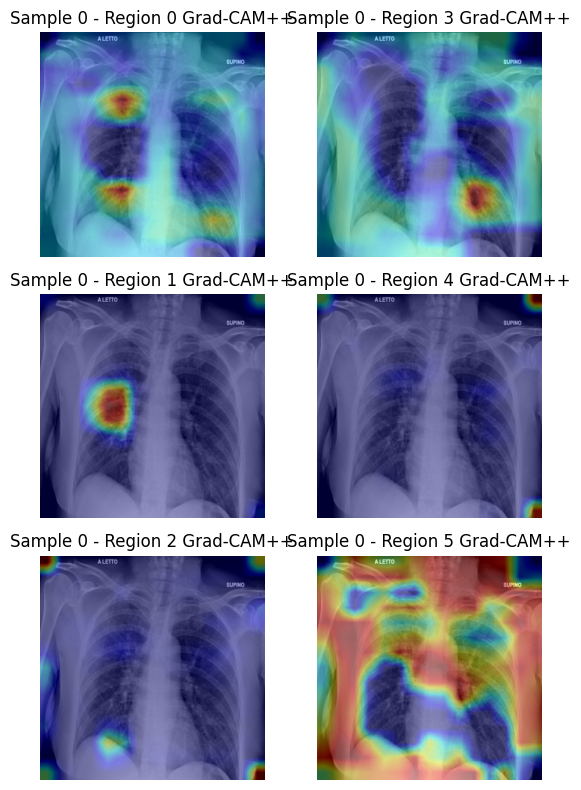

label:tensor([2., 2., 2., 0., 2., 3.], device='cuda:0') , pred:tensor([[2.8969, 2.5053, 2.3335, 0.0504, 2.5880, 2.8139]], device='cuda:0',
       grad_fn=<MulBackward0>)


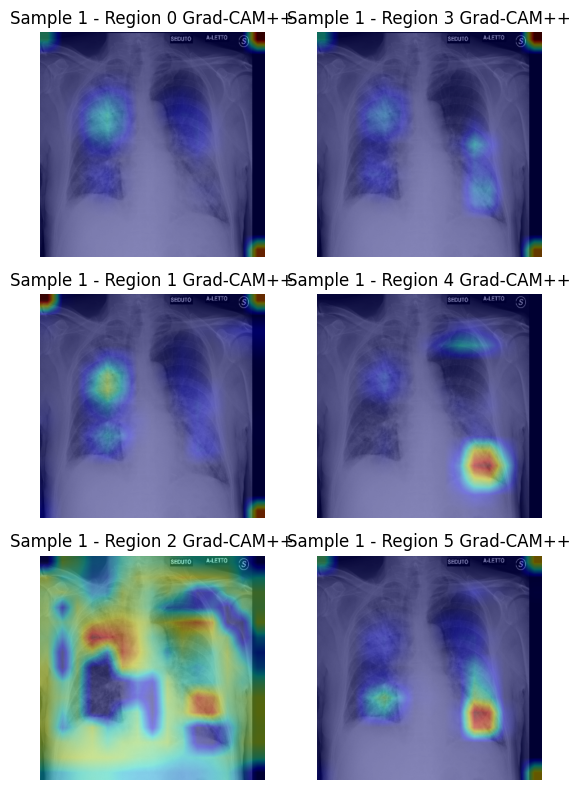

label:tensor([0., 1., 2., 0., 1., 2.], device='cuda:0') , pred:tensor([[0.2353, 1.6062, 1.7277, 0.0808, 1.1078, 1.8524]], device='cuda:0',
       grad_fn=<MulBackward0>)


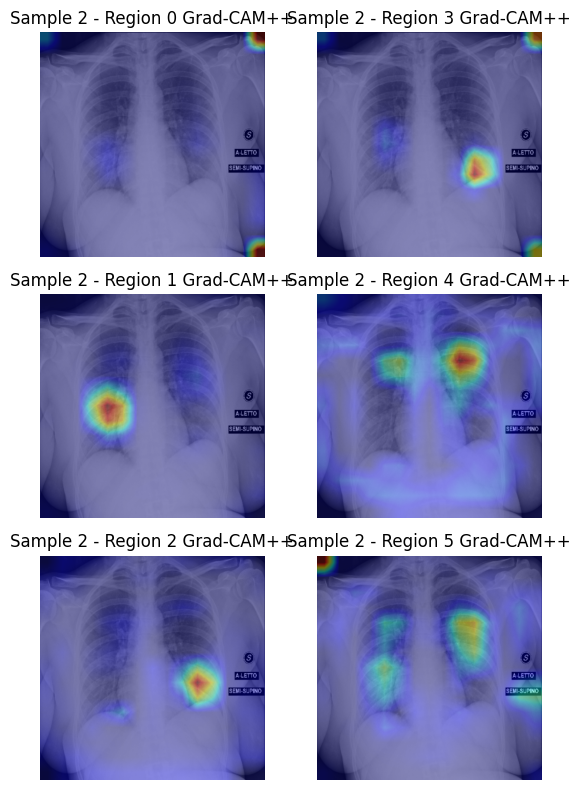

label:tensor([2., 3., 2., 2., 3., 2.], device='cuda:0') , pred:tensor([[1.8756, 2.3848, 1.0897, 1.9363, 2.6579, 2.2225]], device='cuda:0',
       grad_fn=<MulBackward0>)


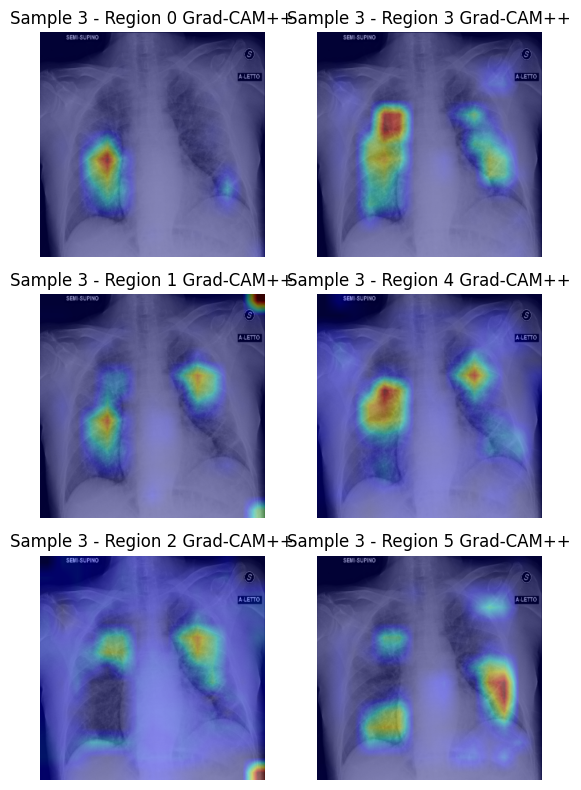

label:tensor([0., 2., 2., 0., 2., 2.], device='cuda:0') , pred:tensor([[0.0904, 0.9479, 2.2171, 0.0725, 1.5684, 1.9221]], device='cuda:0',
       grad_fn=<MulBackward0>)


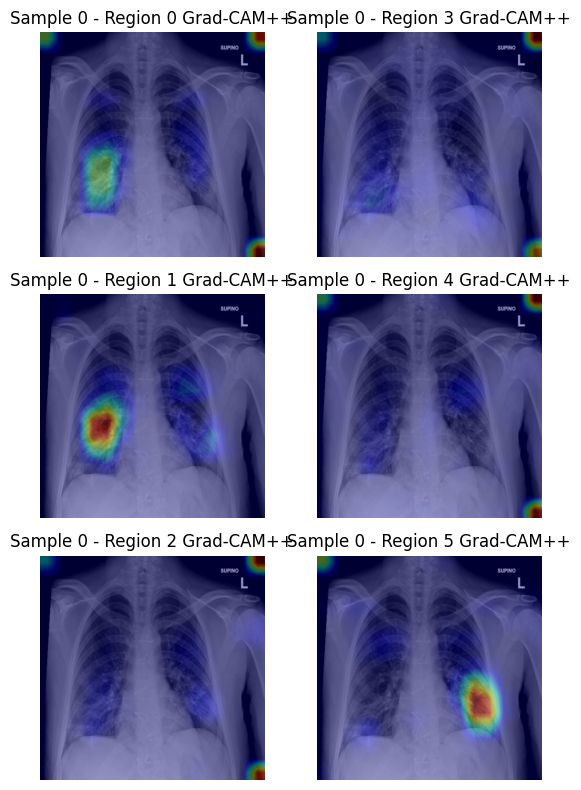

KeyboardInterrupt: 

In [ ]:
import matplotlib.pyplot as plt

target_layer = model.backbone.features[-1] # 마지막 conv block
eps = 1e-8  # 안전한 나눗셈

def forward_hook(module, input, output):
    features.append(output)

def backward_hook(module, grad_input, grad_output):
    gradients.append(grad_output[0])

f_hook = target_layer.register_forward_hook(forward_hook)
b_hook = target_layer.register_full_backward_hook(backward_hook)

for batch_idx, (data, target) in enumerate(val_loader):
    data, target = data.to(DEVICE), target.to(DEVICE)
    
    for idx in range(4):  # 샘플 4개만 처리하므로 수정 가능
        features = []
        gradients = []

        # 부위별 Grad-CAM 결과 저장 리스트
        cams_up = []

        for region_idx in range(6):
            # hook 다시 등록
            f_hook = target_layer.register_forward_hook(lambda m, i, o: features.append(o))
            b_hook = target_layer.register_full_backward_hook(lambda m, gi, go: gradients.append(go[0]))

            input_tensor = data[idx].unsqueeze(0)
            model.eval()
            output = model(input_tensor)

            score = output[0, region_idx]  # 부위별 점수

            model.zero_grad()
            score.backward(retain_graph=True)

            feature_map = features[0][0]
            grad_map = gradients[0][0]

            grad_map2 = grad_map ** 2
            grad_map3 = grad_map ** 3
            global_sum = torch.sum(feature_map * grad_map2, dim=(1,2))
            alpha = grad_map2 / (2*grad_map2 + global_sum[:, None, None] + eps)
            alpha[alpha != alpha] = 0
            weights = torch.sum(alpha * F.relu(grad_map), dim=(1,2))
            cam = torch.sum(weights[:,None,None] * feature_map, dim=0)
            cam = F.relu(cam)
            cam = cam - cam.min()
            cam = cam / (cam.max() + eps)
            cam_up = F.interpolate(cam.unsqueeze(0).unsqueeze(0), size=(data.shape[2], data.shape[3]),
                                   mode='bilinear', align_corners=False).squeeze().detach().cpu().numpy()

            cams_up.append(cam_up)

            # hook 제거 및 리스트 초기화
            f_hook.remove()
            b_hook.remove()
            features.clear()
            gradients.clear()

        # 이미지 복원
        tr_mean = torch.tensor([0.485, 0.456, 0.406], device=data.device).view(3,1,1)
        tr_std = torch.tensor([0.229, 0.224, 0.225], device=data.device).view(3,1,1)
        
        img = (data[idx] * tr_std + tr_mean).to('cpu').numpy().transpose(1,2,0)
        img_show = np.clip(img*255,0,255).astype(np.uint8)

        # 3행 2열 subplot 생성
        fig, axes = plt.subplots(3, 2, figsize=(6, 8))

        # 세로 방향 매핑: 0->(0,0), 1->(1,0), 2->(2,0), 3->(0,1), 4->(1,1), 5->(2,1)
        for i in range(6):
            if i < 3:
                ax = axes[i, 0]
            else:
                ax = axes[i-3, 1]
            ax.imshow(img_show)
            ax.imshow(cams_up[i], cmap='jet', alpha=0.4)
            ax.set_title(f'Sample {idx} - Region {i} Grad-CAM++')
            ax.axis('off')
        print(f'label:{target[idx]} , pred:{output}')
        plt.tight_layout()
        plt.show()